In [44]:
import pandas as pd
import numpy as np 

# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader


# 基础

## Tensor

### 创建

张量的数据类型和numpy.array基本一一对应，但是不支持str类型。

包括:

torch.float64(torch.double),

torch.float32(torch.float),

torch.float16,

torch.int64(torch.long),

torch.int32(torch.int),

torch.int16,

torch.int8,

torch.uint8,

torch.bool

一般神经网络建模使用的都是torch.float32类型。


首先，我们需要明确一下，torch.Tensor()是python类，更明确地说，是默认张量类型torch.FloatTensor()的别名，torch.Tensor([1,2])会调用Tensor类的构造函数init，生成单精度浮点类型的张量。而torch.tensor()是函数。我们通常使用torch.tensor()

In [45]:
## Construct a tensor directly from data:
x = torch.tensor([5.5, 3])

#Construct a 5x3 matrix, uninitialized:
x = torch.empty(5, 3)

#Construct a randomly initialized matrix:
x = torch.rand(5, 3)

#Construct a matrix filled zeros and of dtype long
#pytorch dtype:https://pytorch.org/docs/stable/tensor_attributes.html
x = torch.randint(15, (5, 3),dtype=torch.int8)
x
#create a tensor based on an existing tensor.
t = torch.ones_like(x, dtype=torch.double)      # new_* methods take in sizes
t


#基于GPU版本
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[10, 10, 13],
        [ 2,  3,  9],
        [14,  2,  4],
        [ 4, 14, 12],
        [14,  3, 14]], dtype=torch.int8)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [90]:
aa = torch.Tensor(2,3)
aa

tensor([[0.0000e+00, 2.5244e-29, 2.5457e-19],
        [2.5250e-29, 8.4078e-45, 0.0000e+00]])

### 索引

In [46]:
#与numpy索引一样
x[:,1:]

tensor([[10, 13],
        [ 3,  9],
        [ 2,  4],
        [14, 12],
        [ 3, 14]], dtype=torch.int8)

### 计算

In [47]:
y = torch.rand(5,3)
x+y
torch.add(x,y)
#Any operation that mutates a tensor in-place is post-fixed with an _. For example: x.copy_(y), x.t_(), will change x.
y.add_(x)
x

tensor([[10.8584, 10.6993, 13.2126],
        [ 2.9645,  3.2152,  9.1376],
        [14.2607,  2.5452,  4.3598],
        [ 4.3055, 14.4265, 12.1328],
        [14.6075,  3.3441, 14.1507]])

tensor([[10.8584, 10.6993, 13.2126],
        [ 2.9645,  3.2152,  9.1376],
        [14.2607,  2.5452,  4.3598],
        [ 4.3055, 14.4265, 12.1328],
        [14.6075,  3.3441, 14.1507]])

tensor([[10.8584, 10.6993, 13.2126],
        [ 2.9645,  3.2152,  9.1376],
        [14.2607,  2.5452,  4.3598],
        [ 4.3055, 14.4265, 12.1328],
        [14.6075,  3.3441, 14.1507]])

tensor([[10, 10, 13],
        [ 2,  3,  9],
        [14,  2,  4],
        [ 4, 14, 12],
        [14,  3, 14]], dtype=torch.int8)

### tensor<->numpy
The Torch Tensor and NumPy array will share their underlying memory locations (if the Torch Tensor is on CPU), and changing one will change the other.

In [48]:
a = torch.ones(5)
a
b = a.numpy()
b
c = torch.from_numpy(b)
c
a.add_(1)
a
b
c

tensor([1., 1., 1., 1., 1.])

array([1., 1., 1., 1., 1.], dtype=float32)

tensor([1., 1., 1., 1., 1.])

tensor([2., 2., 2., 2., 2.])

tensor([2., 2., 2., 2., 2.])

array([2., 2., 2., 2., 2.], dtype=float32)

tensor([2., 2., 2., 2., 2.])

### 其他常用函数

#### 尺寸

In [70]:
#查看尺寸
vector = torch.arange(0,12)
print(vector)
print(vector.shape)
print(vector.size())
#使用view改变尺寸
matrix34 = vector.view(3,4)
print(matrix34)
print(matrix34.shape)

# 有些操作会让张量存储结构扭曲，直接使用view会失败，可以用reshape方法

matrix26 = torch.arange(0,12).view(2,6)
print(matrix26)
print(matrix26.shape)

# 转置操作让张量存储结构扭曲
matrix62 = matrix26.t()
print(matrix62.is_contiguous())


# 直接使用view方法会失败，可以使用reshape方法
#matrix34 = matrix62.view(3,4) #error!
matrix34 = matrix62.reshape(3,4) #等价于matrix34 = matrix62.contiguous().view(3,4)
print(matrix34)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
torch.Size([12])
torch.Size([12])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
torch.Size([3, 4])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])
torch.Size([2, 6])
False
tensor([[ 0,  6,  1,  7],
        [ 2,  8,  3,  9],
        [ 4, 10,  5, 11]])


## Gradient

一个Tensor中通常会记录如下图中所示的属性：

- data: 即存储的数据信息
- requires_grad: 设置为True则表示该Tensor需要求导
- grad: 该Tensor的梯度值，每次在计算backward时都需要将前一时刻的梯度归零，否则梯度值会一直累加，这个会在后面讲到。
- grad_fn: 叶子节点通常为None，只有结果节点的grad_fn才有效，用于指示梯度函数是哪种类型。例如上面示例代码中的y.grad_fn=<PowBackward0 at 0x213550af048>, z.grad_fn=<AddBackward0 at 0x2135df11be0>
- is_leaf: 用来指示该Tensor是否是叶子节点。

在反向传播过程中，只有 is_leaf=True 的叶子节点，需要求导的张量的导数结果才会被最后保留下来。

那么什么是叶子节点张量呢？叶子节点张量需要满足两个条件。

1，叶子节点张量是由用户直接创建的张量，而非由某个Function通过计算得到的张量。

2，叶子节点张量的 requires_grad属性必须为True.

Pytorch设计这样的规则主要是为了节约内存或者显存空间，因为几乎所有的时候，用户只会关心他自己直接创建的张量的梯度。

所有依赖于叶子节点张量的张量, 其requires_grad 属性必定是True的，但其梯度值只在计算过程中被用到，不会最终存储到grad属性中。

如果需要保留中间计算结果的梯度到grad属性中，可以使用 retain_grad方法。 如果仅仅是为了调试代码查看梯度值，可以利用register_hook打印日志。

reference：
1. https://zhuanlan.zhihu.com/p/83172023
2. https://github.com/lyhue1991/eat_pytorch_in_20_days/blob/master/2-3,%E5%8A%A8%E6%80%81%E8%AE%A1%E7%AE%97%E5%9B%BE.md

### scalar gradient

In [11]:
#我们自己定义的变量，我们称之为叶子张量(leaf Tensor)，而基于叶子节点得到的中间或最终变量则可称之为结果张量
#这里X是leaf Tensor、其他的都是结果张量
x = torch.tensor(3.0, requires_grad=True)
y = x**2
# z = x + x

y.backward()
x.grad
#只能对leaf Tensor求梯度，下面代码会报错
#y.grad
y.grad_fn

tensor(6.)

### matrix gradient

In [8]:
x = torch.ones(2,requires_grad=True)
z = x + 2
z.backward(torch.ones_like(z))

x.grad
z.grad_fn

tensor([1., 1.])

### 梯度是累加的

正因为求导链式法则衍生的梯度累加规则，张量的grad梯度不会自动清零，在需要的时候需要手动置零。

In [ ]:
#梯度是累加的。可以发现我们的w初始为-0.8820,计算出来的导数为-47.0557 第2行是backward计算的，第3行是我们自己计算的。但是发现下面的第4、5行和想象的不一样，手动计算的好像没问题还是-47.0557，但为什么backward计算的变成了-94.1115,似乎是-47.0557*2,其实是因为pytorch设计就是这样的，它的梯度默认会保存累加，所以这次的梯度是我们这次的加上上一次的。讲到这里，估计也就明白了为什么我们在进行梯度下降的时候需要用optimizer.zero_grad()了，就是要清空梯度。
x = torch.tensor([2])
y = torch.tensor([10])
loss = torch.nn.MSELoss()
w = torch.randn(1,requires_grad=True)
for i in range(10):
    print('w = ',w)
    y_ = w*x
    l = loss(y,y_)
    print('loss = ', l)
    l.backward()
    print('w grad = ',w.grad)

#上面的例子只是计算了梯度，并没有进行梯度更新。下面加入更新梯度。（因为这里我重新定义了w，相当于清空了梯度，所以w的梯度不会累加了）
w = torch.randn(1,requires_grad=True)
# print(w)
for i in range(10):
    print('w = ',w)
    y_ = w*x
    l = loss(y,y_)
    print('loss = ', l)
    l.backward()
    print('w grad = ',w.grad)
    w = torch.tensor(w - 0.1 * w.grad.data, requires_grad=True)

## 

# 实现简单的NN

## numpy NN

In [42]:
N, D_in, H, D_out = 64, 1000, 100, 10

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(500):
    #forward
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    #loss
    loss = np.square(y_pred - y).sum()
    if(t%50 == 0):
        print(t, loss)
    
    #backward
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #update weight
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 30868888.97226157
50 15115.76309242181
100 668.9667192362771
150 47.77611498273488
200 4.117628487738955
250 0.39061195227189
300 0.03923053182559015
350 0.004092673947545223
400 0.00043904978012960187
450 4.8150229161684405e-05


## tensor NN（自动求导）

In [5]:
dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0") # Uncomment this to run on GPU

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random input and output data
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Randomly initialize weights
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    #forward
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    
    #loss
    loss = (y_pred - y).pow(2).sum()
    if(t%50 == 0):
        print(t, loss.item())
    
    #backward
    loss.backward()
    
    #update weight
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad

        # Manually zero the gradients after updating weights
        w1.grad.zero_()
        w2.grad.zero_()

0 31319074.0
50 11566.169921875
100 335.9598693847656
150 16.663705825805664
200 1.0278314352035522
250 0.0703810453414917
300 0.005294266156852245
350 0.0006232215091586113
400 0.00014879746595397592
450 5.6777495046844706e-05


## nn module（构建网络层，使用策略自动更新weight）

In [13]:

N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

model = nn.Sequential(
    nn.Linear(D_in, H), #nn.Linear根据我们给的网络维度，帮我们随机生成合理的w
    nn.ReLU(),
    nn.Linear(H, D_out),
)

loss_fn = nn.MSELoss(reduction='sum')
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(500):
    #forward
    y_pred=model(x)
    
    #loss
    loss = loss_fn(y_pred, y)
    if(t%50==0):
        print(t, loss.item())
    
    optimizer.zero_grad()
    #backward
    loss.backward()
    #update weight
    optimizer.step()

0 643.749755859375
50 205.24661254882812
100 56.13291931152344
150 10.085933685302734
200 1.038871169090271
250 0.07492955774068832
300 0.004597858525812626
350 0.0002783302334137261
400 1.5107957551663276e-05
450 6.134810632829613e-07


In [26]:
model

Sequential(
  (0): Linear(in_features=1000, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
)

##  Custom nn Modules

In [84]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        #定义模型的框架（有几层，每一层的结构等等）
        self.linear1=nn.Linear(D_in, H)
        self.linear2=nn.Linear(H, D_out)
    
    #定义forward过程
    def forward(self, x):
        h_relu = self.linear1(x).clamp(min=0)
        y_pred = self.linear2(h_relu)
        return y_pred
    
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = TwoLayerNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
loss_fn = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for t in range(500):
    #forward
    y_pred=model(x)#等价于调用model.__call__(x)，call函数里再调用的forward，同时会做一些额外操作
    
    #loss
    loss = loss_fn(y_pred, y)
    if(t%50==0):
        print(t, loss.item())
    
    optimizer.zero_grad()
    #backward
    loss.backward()
    #update weight
    optimizer.step()

0 687.6841430664062
50 29.253353118896484
100 1.5906261205673218
150 0.16632196307182312
200 0.023523369804024696
250 0.003940855618566275
300 0.0007560442318208516
350 0.0001624409487703815
400 3.8227102777455e-05
450 9.624174708733335e-06


# CNN

## 下载数字图片

In [33]:
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

In [34]:
import pickle
import gzip

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

(50000, 784)


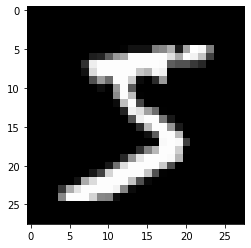

In [35]:
from matplotlib import pyplot
import numpy as np

pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

In [38]:
x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)
n, c = x_train.shape
x_train, x_train.shape, y_train.min(), y_train.max()
print(x_train, y_train)
print(x_train.shape)
print(y_train.min(), y_train.max())

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]) tensor([5, 0, 4,  ..., 8, 4, 8])
torch.Size([50000, 784])
tensor(0) tensor(9)


/Users/maowei/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


## NN

In [61]:
lr = 0.5  # learning rate
epochs = 10  # how many epochs to train for
bs = 64  # batch size

train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)


loss_fn = F.cross_entropy

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

class Minst(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(784, 10)

    def forward(self, xb):
        return self.lin(xb)

def loss_batch(model, loss_fn, xb, yb, opt=None):
    loss = loss_fn(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model,loss_fn, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_item = loss_batch(model, loss_fn, xb, yb, opt)
        
        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_fn, xb, yb) for xb, yb in valid_dl]
            )
            
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)

        print(epoch, loss_item, val_loss)

train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
model = Minst()
opt = torch.optim.SGD(model.parameters(), lr=lr)
fit(epochs, model, loss_fn, opt, train_dl, valid_dl)

0 (0.0679100975394249, 16) 0.2866165160894394
1 (0.617365837097168, 16) 0.2974862951159477
2 (0.3463827073574066, 16) 0.30067217158079146
3 (0.20770063996315002, 16) 0.31788732942342757
4 (0.23628422617912292, 16) 0.3049044818878174
5 (0.2148873507976532, 16) 0.2713981810927391
6 (0.19054290652275085, 16) 0.2836770218372345
7 (0.21251337230205536, 16) 0.29853407337665555
8 (0.08313342183828354, 16) 0.2808372601389885
9 (0.41763293743133545, 16) 0.4768479731798172


## CNN

In [65]:
class Mnist_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))

lr = 0.1
model = Mnist_CNN()
opt = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)
fit(epochs, model, loss_fn, opt, train_dl, valid_dl)

0 (0.18389807641506195, 16) 0.3830242917060852
1 (0.11506768316030502, 16) 0.3079795881509781
2 (0.5513493418693542, 16) 0.26056444685459135
3 (0.20774312317371368, 16) 0.20544925727844238
4 (0.38966143131256104, 16) 0.1965486317396164
5 (0.022901831194758415, 16) 0.18347946635484697
6 (0.46698108315467834, 16) 0.18264607759714127
7 (0.10476616024971008, 16) 0.17637408133745194
8 (0.4923562705516815, 16) 0.16493395055532456
9 (0.021470418199896812, 16) 0.1625191925764084


In [73]:
model.loss_fn = 11

In [79]:
dir(model)

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_name',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_modules',
 '_named_members',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',
 'bfloat16',
 'buffers',
 'children',
 'conv1',
 'conv2',
 'conv3',
 'cpu',
 'cuda',
 'double',
 'dump_patches',
 'eval',
 'extra_repr',
 'float',
 'forward',
 'half',
 'load_

<bound method Module.cpu of Mnist_CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(16, 10, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
)>

## 总结

https://pytorch.org/tutorials/beginner/nn_tutorial.html#switch-to-cnn

- torch.nn
    - Module: creates a callable which behaves like a function, but can also contain state(such as neural net layer weights). It knows what Parameter (s) it contains and can zero all their gradients, loop through them for weight updates, etc.
    - Parameter: a wrapper for a tensor that tells a Module that it has weights that need updating during backprop. Only tensors with the requires_grad attribute set are updated
    - functional: a module(usually imported into the F namespace by convention) which contains activation functions, loss functions, etc, as well as non-stateful versions of layers such as convolutional and linear layers.
- torch.optim: Contains optimizers such as SGD, which update the weights of Parameter during the backward step
- Dataset: An abstract interface of objects with a __len__ and a __getitem__, including classes provided with Pytorch such as TensorDataset
- DataLoader: Takes any Dataset and creates an iterator which returns batches of data.